# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
#making a copy of original data
df1 = pd.read_csv('forestfires.csv')
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [7]:
df = df1.copy()
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
df.value_counts().sum()

517

In [11]:
df.shape

(517, 31)

In [12]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.isnull()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.0,91.0,81.6,81.6,81.6,81.6,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
RH,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31
wind,6.7,0.9,1.3,4.0,1.8,5.4,3.1,2.2,5.4,4.0,...,3.6,3.6,7.6,5.4,2.7,2.7,5.8,6.7,4.0,4.5
rain,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


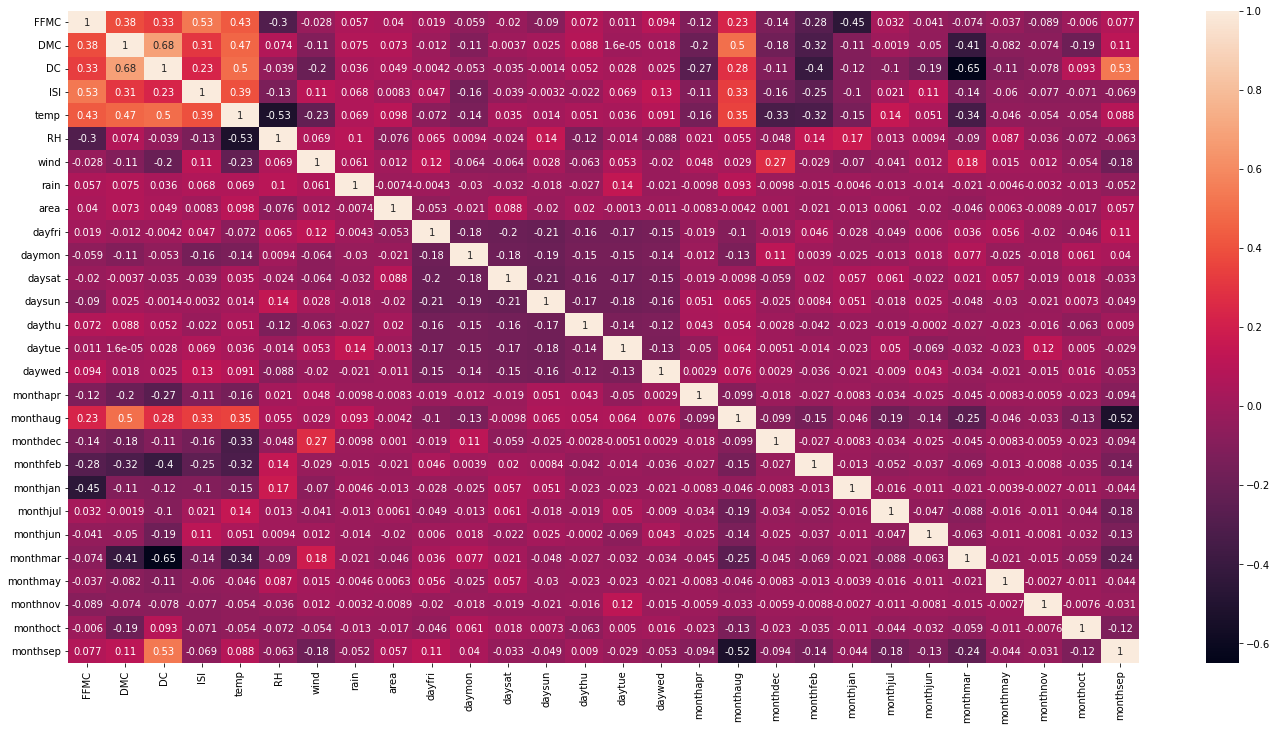

In [17]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

scatter plot using matplotlib.pyplot illustrating the relationship between DMC() & FFMC ranking

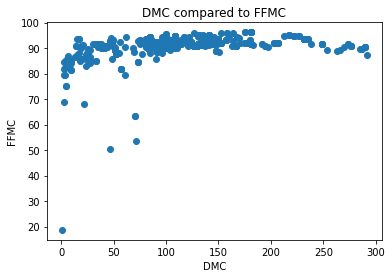

In [18]:
plt.scatter(x = df.DMC , y = df.FFMC )
plt.xlabel("DMC")
plt.ylabel("FFMC")
plt.title("DMC compared to FFMC")
plt.show()

plotting a bar graph showing how many fires have occurred in each day 

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


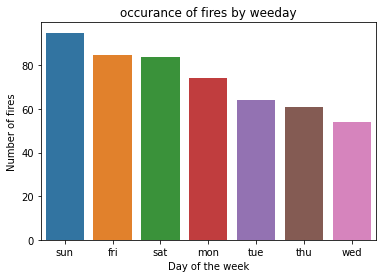

In [19]:
print (df['day'].value_counts())
barplot = sns.barplot(x=df.day.value_counts().index,y=df.day.value_counts())
barplot.set_xlabel('Day of the week')
barplot.set_ylabel('Number of fires')
barplot.set_title('occurance of fires by weeday')
plt.show()

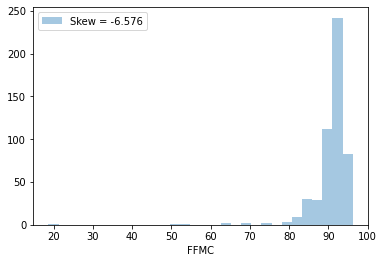

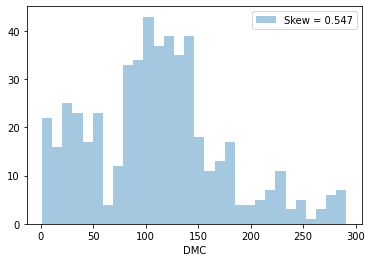

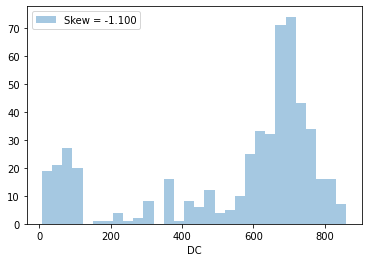

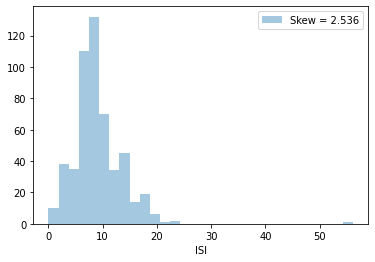

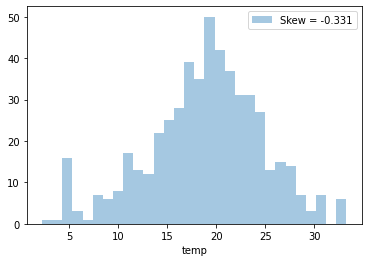

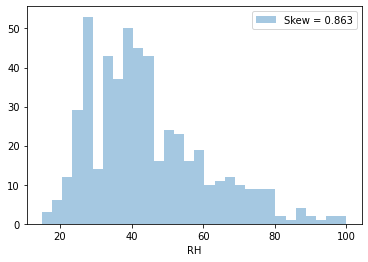

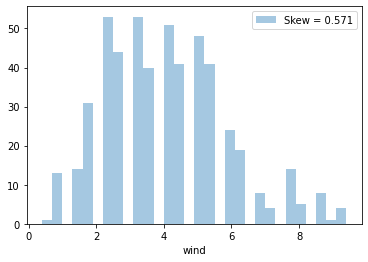

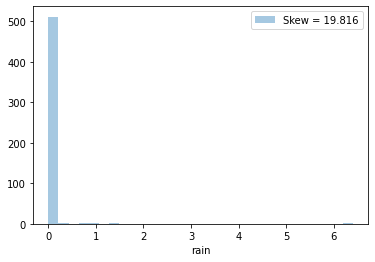

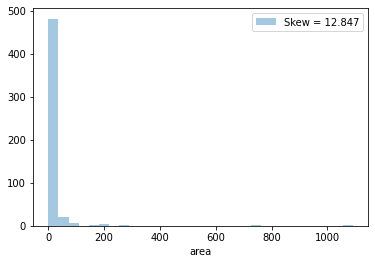

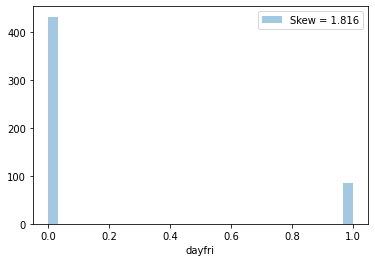

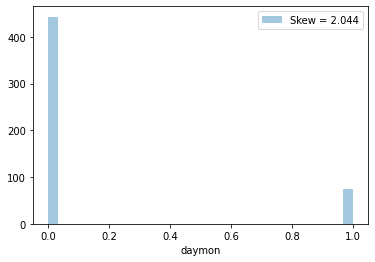

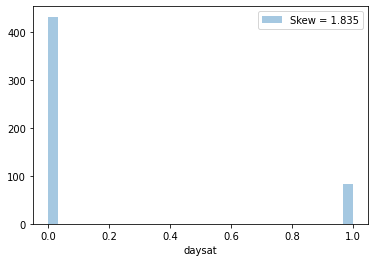

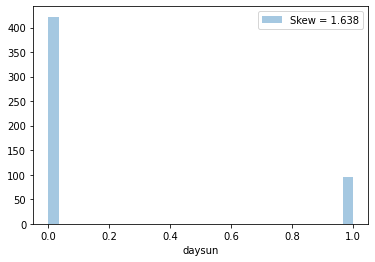

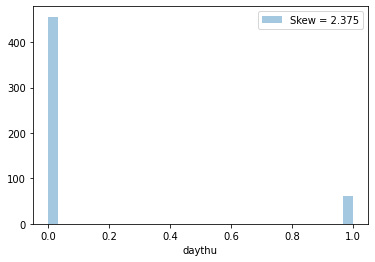

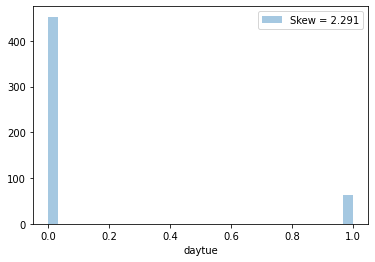

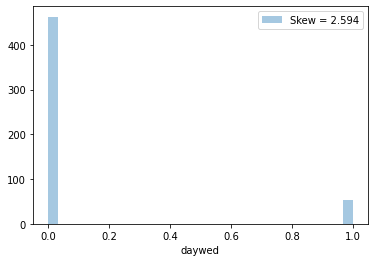

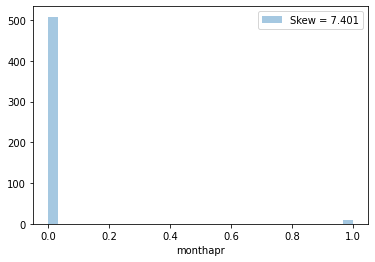

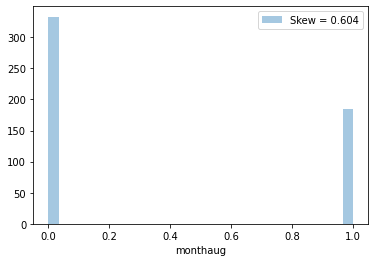

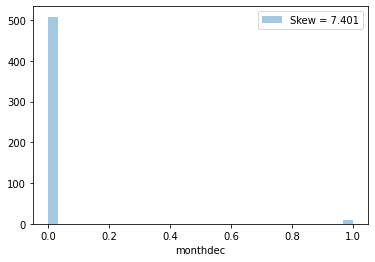

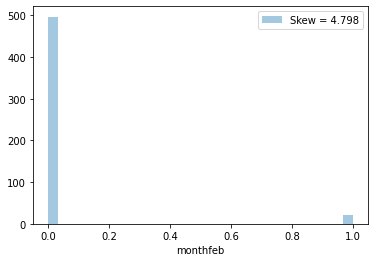

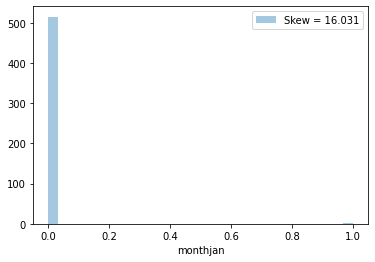

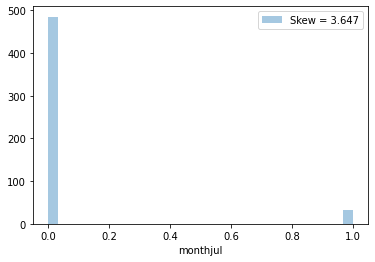

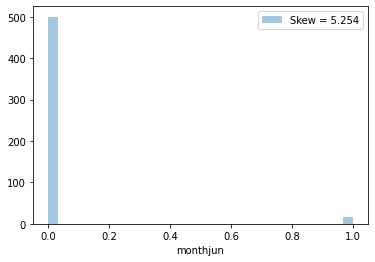

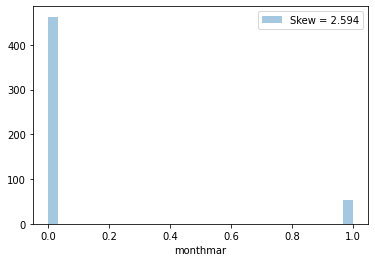

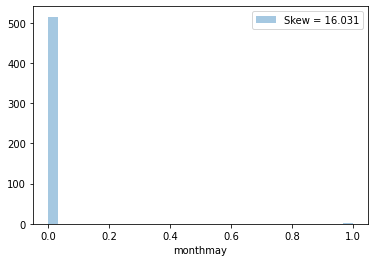

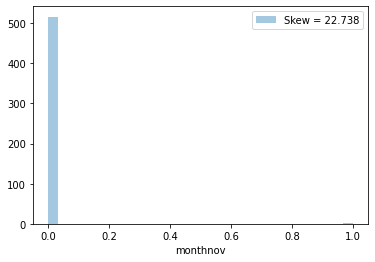

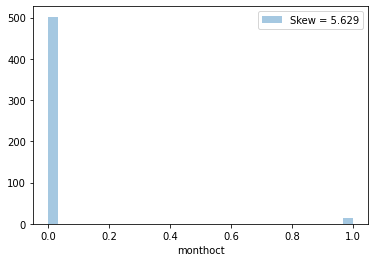

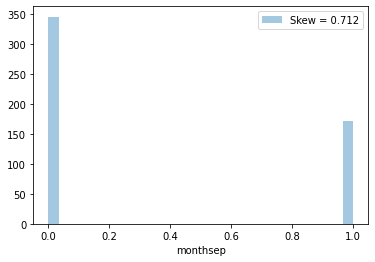

In [20]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [21]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [22]:
numerical_feature = df.describe(include=["int64", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


In [23]:
#sns.set_style('whitegrid')
#sns.pairplot(df[numerical_feature])
#plt.show()

In [24]:
categorical_features = df.describe(include=["object"]).columns

print(list(categorical_features))

['month', 'day', 'size_category']


In [25]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 

df['month']= label_encoder.fit_transform(df['month']) 
 

In [26]:
print(df.head())

   month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      7  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      7  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      7  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          s

In [27]:
df['size_category'] = np.where(df['area'] > 6, '1', '0')
df['size_category']= pd.to_numeric(df['size_category'])
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,7,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
df['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [29]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))

# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})


Text(0.5, 1.0, 'Count plot of weekend vs weekday')

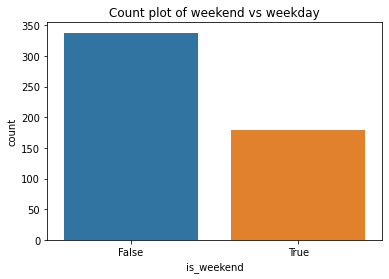

In [30]:
# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

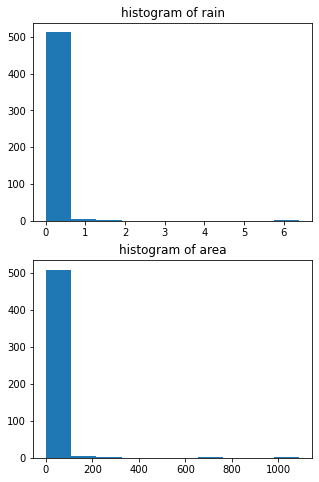

In [31]:
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

In [32]:
features = df.drop(['size_category'], axis = 1)
labels = df['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 0)

In [33]:
# fitting scaler
sc_features = StandardScaler()


In [34]:
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)


In [35]:
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)


In [36]:
# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train.head()

,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,1.110543,1.290994,-0.025134,-0.179193,0.754550,0.626787,0.285366,0.643972,0.758500,-0.140028,...,-0.098533,-0.268635,0.0,-0.224733,-0.172345,-0.288675,0.0,0.0,-0.172345,1.264911
1,1.110543,-0.774597,-0.067986,-0.445232,0.669344,-0.632485,-0.196085,1.161138,0.465033,-0.140028,...,-0.098533,-0.268635,0.0,-0.224733,-0.172345,-0.288675,0.0,0.0,-0.172345,1.264911
2,-1.127761,-0.774597,0.231976,1.395427,0.273534,-0.262111,0.165003,0.320743,-0.063208,-0.140028,...,-0.098533,-0.268635,0.0,-0.224733,-0.172345,-0.288675,0.0,0.0,-0.172345,-0.790569
3,0.215222,1.290994,-0.282244,-0.934079,-1.966590,0.182338,-1.279350,-0.390361,0.993274,-0.140028,...,-0.098533,-0.268635,0.0,-0.224733,-0.172345,3.464102,0.0,0.0,-0.172345,-0.790569
4,-1.127761,1.290994,0.339105,-0.426942,-0.377475,0.750245,-0.436811,-0.131778,-0.063208,-0.140028,...,-0.098533,-0.268635,0.0,-0.224733,-0.172345,-0.288675,0.0,0.0,-0.172345,-0.790569


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras

In [38]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=30, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary() #summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 186       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile model
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size  = 20, epochs = 500)

Epoch 1/500
21/21 [==============================] - 3s 42ms/step - loss: 2.5404 - accuracy: 0.7240 - val_loss: 2.8565 - val_accuracy: 0.7115
Epoch 2/500
21/21 [==============================] - 0s 10ms/step - loss: 2.6600 - accuracy: 0.6925 - val_loss: 2.8233 - val_accuracy: 0.7115
Epoch 3/500
21/21 [==============================] - 0s 6ms/step - loss: 2.4782 - accuracy: 0.6877 - val_loss: 2.6838 - val_accuracy: 0.7115
Epoch 4/500
21/21 [==============================] - 0s 9ms/step - loss: 2.5025 - accuracy: 0.6755 - val_loss: 2.4435 - val_accuracy: 0.7115
Epoch 5/500
21/21 [==============================] - 0s 11ms/step - loss: 2.3928 - accuracy: 0.6755 - val_loss: 2.0943 - val_accuracy: 0.7115
Epoch 6/500
21/21 [==============================] - 0s 10ms/step - loss: 2.2505 - accuracy: 0.7046 - val_loss: 2.1067 - val_accuracy: 0.7115
Epoch 7/500
21/21 [==============================] - 0s 10ms/step - loss: 2.0496 - accuracy: 0.6877 - val_loss: 1.9592 - val_accuracy: 0.7115
Epoch 8/

In [40]:
# evaluate the model
_,train_acc = model.evaluate(X_train, y_train, verbose=0)
_,valid_acc = model.evaluate(X_test, y_test, verbose=0)
print("Train: %.3f, Valid: %.3f" % (train_acc,valid_acc))

Train: 0.915, Valid: 0.808


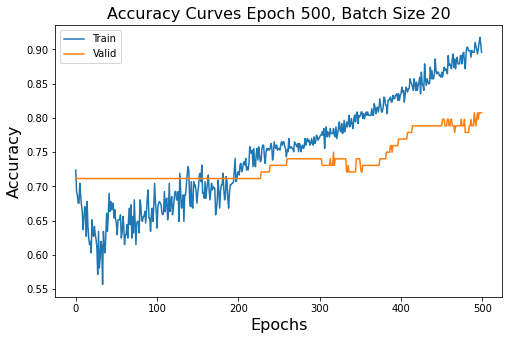

In [41]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 500, Batch Size 20', fontsize=16)
plt.show()